# Elastix

This notebooks show very basic image registration examples with on-the-fly generated binary images.

In [3]:
from itk import itkElastixRegistrationMethodPython
from itk import itkTransformixFilterPython
import itk
import numpy as np
import matplotlib.pyplot as plt

## Image generators

In [4]:
def image_generator(x1, x2, y1, y2, bspline=False):
    image = np.zeros([100, 100], np.float32)
    for x in range(x1, x2):
        for y in range(y1, y2):
            if bspline:
                y += x
                if x > 99 or y > 99:
                    pass
                else:
                    image[y, x] = 1
            else:
                image[y, x] = 1
    image = itk.image_view_from_array(image)
    return image

## Bspline Test

In [5]:
# Create test images
fixed_image_bspline = image_generator(25,65,25,65)
moving_image_bspline = image_generator(5,55,5,40, bspline=True)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_affine_parameter_map = parameter_object.GetDefaultParameterMap('affine')
parameter_object.AddParameterMap(default_affine_parameter_map)
default_bspline_parameter_map = parameter_object.GetDefaultParameterMap('bspline')
parameter_object.AddParameterMap(default_bspline_parameter_map)

In [6]:
# Call registration function
result_image_bspline, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_bspline, moving_image_bspline,
    parameter_object=parameter_object,
    log_to_console=True)

### Bspline Test Transformix

In [7]:
# Load Transformix Object
transformix_object = itk.TransformixFilter.New()
transformix_object.SetMovingImage(moving_image_bspline)
transformix_object.SetTransformParameterObject(result_transform_parameters)

# Update object (required)
transformix_object.UpdateLargestPossibleRegion()

# Results of Transformation
result_image_transformix = transformix_object.GetOutput()


### Bspline Test Visualization

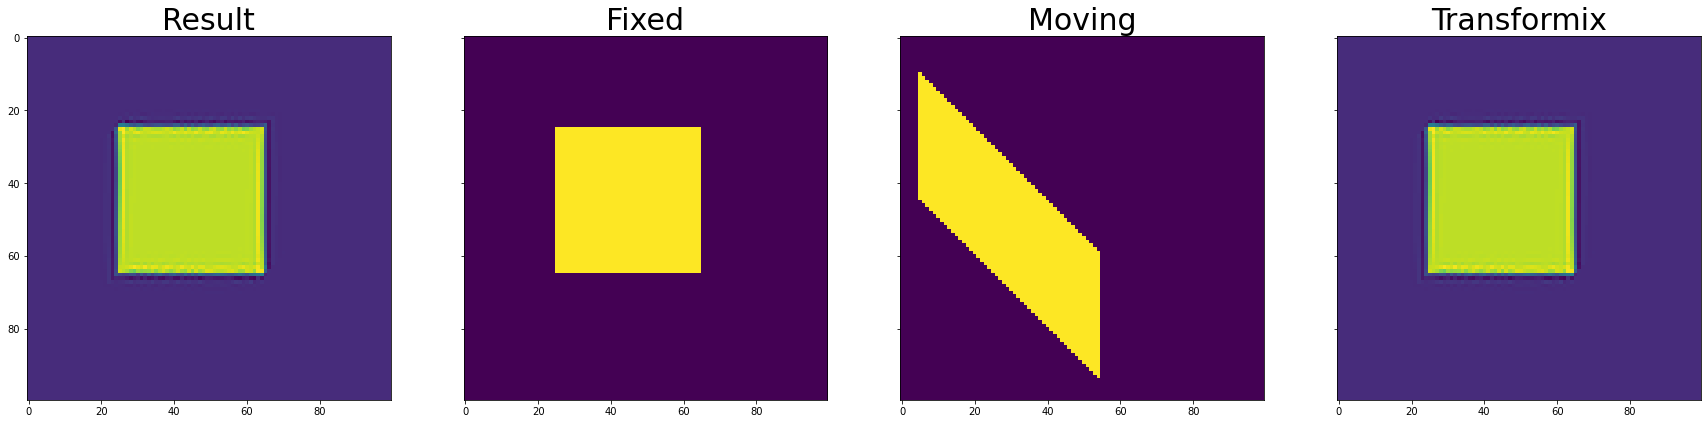

In [8]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,4, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_bspline)
axs[0].set_title('Result', fontsize=30)
axs[1].imshow(fixed_image_bspline)
axs[1].set_title('Fixed', fontsize=30)
axs[2].imshow(moving_image_bspline)
axs[2].set_title('Moving', fontsize=30)
axs[3].imshow(result_image_transformix)
axs[3].set_title('Transformix', fontsize=30)
plt.show()